In [ ]:
""" Data set: TeePublic_review.csv
       - reviewer_id: Mã định danh duy nhất cho mỗi người đánh giá, đảm bảo tính ẩn danh và riêng tư.

       - store_location: Thông tin địa lý chỉ định vị trí của cửa hàng thời trang TeePublic.

       - latitude: Tọa độ vĩ độ của vị trí cửa hàng, cung cấp dữ liệu địa lý chính xác.

       - longitude: Tọa độ kinh độ của vị trí cửa hàng, mang lại thông tin địa lý chi tiết.

       - date: Ngày cụ thể khi đánh giá được đăng, cho phép phân tích theo thời gian.

       - month: Tháng trong đó đánh giá được đăng, hỗ trợ việc khám phá xu hướng hàng tháng.

       - year: Năm của đánh giá, cho phép phân tích hàng năm và nhận diện xu hướng.

       - title: Tiêu đề liên quan đến mỗi đánh giá, ghi lại cảm nhận ngắn gọn hoặc điểm chính.

       - review: Nội dung văn bản của đánh giá, trình bày phản hồi chi tiết từ khách hàng.

       - review-label: Điểm đánh giá của người đánh giá trên thang điểm từ 1 đến 5, cung cấp một đánh giá số liệu về sự hài lòng.  """

In [16]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('TeePublic_review1.csv', encoding='latin1')

# Tiền xử lý dữ liệu
df['review'].fillna('', inplace=True)
data = df[['review', 'review-label']]
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['review-label'], test_size=0.1, random_state=50)

# Chuyển đổi văn bản thành vector TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)




In [ ]:

# Xây dựng các mô hình học máy
# Naive Bayes
naive_bayes = MultinomialNB()
svm = SVC(C=1, kernel='linear')
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()



# Continual Learning và Test Production
naive_bayes_continual = clone(naive_bayes)
naive_bayes_continual.fit(train_vectors, train_labels)

svm_continual = clone(svm)
svm_continual.fit(train_vectors, train_labels)

mlp_continual = clone(mlp)
mlp_continual.fit(train_vectors, train_labels)


rf_continual = clone(rf)
rf_continual.fit(train_vectors, train_labels)


knn_continual = clone(knn)
knn_continual.fit(train_vectors, train_labels)


In [18]:
#Test production cho các mô hình

# Dữ liệu mới cho Test Production
new_data = pd.read_csv('TeePublic_review2.csv', encoding='latin1')  # Thay 'new_data.csv' bằng tên tệp mới

# Tiền xử lý dữ liệu cho Test Production
new_data['review'].fillna('', inplace=True)
new_test_data = new_data[['review', 'review-label']]
new_test_vectors = tfidf_vectorizer.transform(new_test_data['review'])



Test Production - Naive Bayes:
Accuracy: 0.8171634326865373
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       224
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00       218
           4       0.00      0.00      0.00       344
           5       0.82      1.00      0.90      4085

    accuracy                           0.82      4999
   macro avg       0.16      0.20      0.18      4999
weighted avg       0.67      0.82      0.73      4999


Test Production - Support Vector Machine:
Accuracy: 0.8243648729745949
Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.12      0.19       224
           2       0.07      0.01      0.01       128
           3       0.30      0.08      0.12       218
           4       0.27      0.02      0.03       344
           5       0.84      1.00      0.91      4085

    

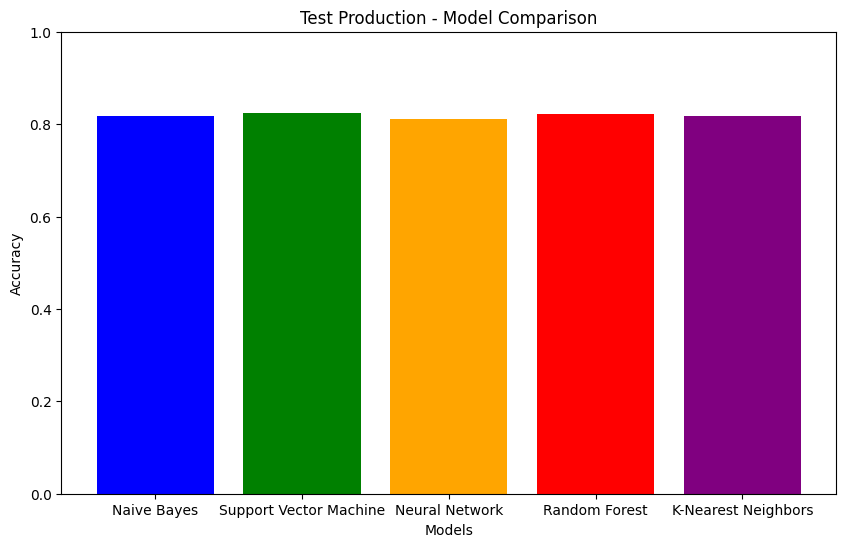

In [17]:

# Đánh giá hiệu suất trên dữ liệu mới
print('\nTest Production - Naive Bayes:')
print('Accuracy:', accuracy_score(new_test_data['review-label'], naive_bayes_continual.predict(new_test_vectors)))
print('Classification Report:\n', classification_report(new_test_data['review-label'], naive_bayes_continual.predict(new_test_vectors)))

print('\nTest Production - Support Vector Machine:')
print('Accuracy:', accuracy_score(new_test_data['review-label'], svm_continual.predict(new_test_vectors)))
print('Classification Report:\n', classification_report(new_test_data['review-label'], svm_continual.predict(new_test_vectors)))

print('\nTest Production - Neural Network:')
print('Accuracy:', accuracy_score(new_test_data['review-label'], mlp_continual.predict(new_test_vectors)))
print('Classification Report:\n', classification_report(new_test_data['review-label'], mlp_continual.predict(new_test_vectors)))

print('\nTest Production - Random Forest:')
print('Accuracy:', accuracy_score(new_test_data['review-label'], rf_continual.predict(new_test_vectors)))
print('Classification Report:\n', classification_report(new_test_data['review-label'], rf_continual.predict(new_test_vectors)))

print('\nTest Production - K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(new_test_data['review-label'], knn_continual.predict(new_test_vectors)))
print('Classification Report:\n', classification_report(new_test_data['review-label'], knn_continual.predict(new_test_vectors)))

# Vẽ biểu đồ so sánh hiệu suất của các mô hình
models = {
    'Naive Bayes': naive_bayes_continual,
    'Support Vector Machine': svm_continual,
    'Neural Network': mlp_continual,
    'Random Forest': rf_continual,
    'K-Nearest Neighbors': knn_continual
}

# Đánh giá hiệu suất trên dữ liệu mới
accuracies = []
for model_name, model in models.items():
    accuracy = accuracy_score(new_test_data['review-label'], model.predict(new_test_vectors))
    accuracies.append(accuracy)
    print(f'\nTest Production - {model_name}:')
    print('Accuracy:', accuracy)
    print('Classification Report:\n', classification_report(new_test_data['review-label'], model.predict(new_test_vectors)))

# Vẽ biểu đồ so sánh hiệu suất của các mô hình
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Production - Model Comparison')
plt.ylim([0, 1])
plt.show()